In [1]:
import numpy as np
import pandas as pd
import os
import glob
from pathlib import Path, PosixPath
import json

In [ ]:
!pip install SoccerNet
python Download/download_ball_data.py --dataset_dir path/to/SoccerNet --password_videos "password_received_from_NDA"


# Understanding Properties of Pandas DF

In [2]:
select_game: str = "2019-10-01 - Blackburn Rovers - Nottingham Forest"
game_data_folder: PosixPath = Path("../data/spotting-ball-2024/england_efl/2019-2020") / select_game
specific_json_data: PosixPath = game_data_folder / "Labels-ball.json"

In [3]:
specific_data = None
with open(specific_json_data, "r") as f:
    specific_data = json.load(f)

In [4]:
url_local = specific_data["UrlLocal"]
annotations = specific_data["annotations"]

for a in annotations:
    a["Url_Local"] = url_local

columns = annotations[0].keys()
print(columns)

dict_keys(['gameTime', 'label', 'position', 'team', 'visibility', 'Url_Local'])


# Automated Pandas

In [5]:
df_init= {
    "gameTime": [], "label": [], "position": [], "team": [], "visibility": [], "url_local": []
}

df = pd.DataFrame(columns=['gameTime', 'label', 'position', 'team', 'visibility', 'url_local'])

In [6]:
MAIN_DATA_FOLDER = "../data/spotting-ball-2024/england_efl/2019-2020"
for game_dir in os.listdir(MAIN_DATA_FOLDER):
    full_game_dir = Path(MAIN_DATA_FOLDER +"/" +game_dir)
    json_files = list(full_game_dir.glob("*.json"))
    print(full_game_dir)
    if len(json_files):
        with open(json_files[0], 'r') as f:
            json_raw = json.load(f)
        
        # add the url to identify which game each occured
        url_local = json_raw["UrlLocal"]
        rows = json_raw["annotations"]
        for row in rows:
            row["url_local"] = url_local

        df_ = pd.DataFrame(rows)

        df = pd.concat([df, df_], ignore_index=True)
        

../data/spotting-ball-2024/england_efl/2019-2020/2019-10-01 - Blackburn Rovers - Nottingham Forest
../data/spotting-ball-2024/england_efl/2019-2020/2019-10-01 - Brentford - Bristol City
../data/spotting-ball-2024/england_efl/2019-2020/2019-10-01 - Wigan Athletic - Birmingham City
../data/spotting-ball-2024/england_efl/2019-2020/2019-10-01 - Leeds United - West Bromwich
../data/spotting-ball-2024/england_efl/2019-2020/2019-10-01 - Reading - Fulham
../data/spotting-ball-2024/england_efl/2019-2020/2019-10-01 - Stoke City - Huddersfield Town
../data/spotting-ball-2024/england_efl/2019-2020/2019-10-02 - Cardiff City - Queens Park Rangers
../data/spotting-ball-2024/england_efl/2019-2020/2019-10-01 - Middlesbrough - Preston North End
../data/spotting-ball-2024/england_efl/2019-2020/2019-10-01 - Hull City - Sheffield Wednesday


# Notes on Dataset

- There is a lot more data points for the Blackburn Rovers game compared to all the other games (15408 v. ~2000 for all other games)
- All the actions are visible
- Position is ms into the video in which the action begins on the live gamecast

In [7]:
df.columns

Index(['gameTime', 'label', 'position', 'team', 'visibility', 'url_local'], dtype='object')

In [8]:
df["url_local"].value_counts()

england_efl/2019-2020/2019-10-01 - Reading - Fulham                        2136
england_efl/2019-2020/2019-10-01 - Blackburn Rovers - Nottingham Forest    1926
england_efl/2019-2020/2019-10-01 - Stoke City - Huddersfield Town          1844
england_efl/2019-2020/2019-10-01 - Brentford - Bristol City                1815
england_efl/2019-2020/2019-10-01 - Middlesbrough - Preston North End       1604
england_efl/2019-2020/2019-10-01 - Leeds United - West Bromwich            1573
england_efl/2019-2020/2019-10-01 - Hull City - Sheffield Wednesday         1535
Name: url_local, dtype: int64

In [9]:
df["visibility"].value_counts()

visible    12433
Name: visibility, dtype: int64

# Getting Specific MS Frame

In [10]:
row = df.iloc[0]
t_msec = row["position"]
row

gameTime                                              1 - 00:00
label                                                      PASS
position                                                    680
team                                                       away
visibility                                              visible
url_local     england_efl/2019-2020/2019-10-01 - Blackburn R...
Name: 0, dtype: object

In [11]:
video_file = Path("../data/spotting-ball-2024/"+ row["url_local"] + "/720p.mp4")
print(video_file)

../data/spotting-ball-2024/england_efl/2019-2020/2019-10-01 - Blackburn Rovers - Nottingham Forest/720p.mp4


In [12]:
import cv2

In [13]:
print(video_file)

../data/spotting-ball-2024/england_efl/2019-2020/2019-10-01 - Blackburn Rovers - Nottingham Forest/720p.mp4


In [14]:
video = cv2.VideoCapture(str(video_file))


In [15]:
FPS = video.get(cv2.CAP_PROP_FPS)
FPS

25.0

In [ ]:
!conda install matplotlib -y

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.1
  latest version: 24.1.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/hice1/rmehta98/.conda/envs/SoccerNet-FeatureExtraction

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotli-1.0.9               |       h5eee18b_7          18 KB
    brotli-bin-1.0.9           |       h5eee18b_7          19 KB
    cycler-0.11.0              |     pyhd3eb1b0_0          12 KB
    fonttools-4.25.0           |     pyhd3eb1b0_0         632 KB
    kiwisolver-1.3.2           |   py37h295

In [16]:
import matplotlib.pyplot as plt

In [17]:
video.set(cv2.CAP_PROP_POS_MSEC, int(t_msec))
ret, frame = video.read()
print(ret)

True


< cv2.VideoCapture 0x2aaaee728170>


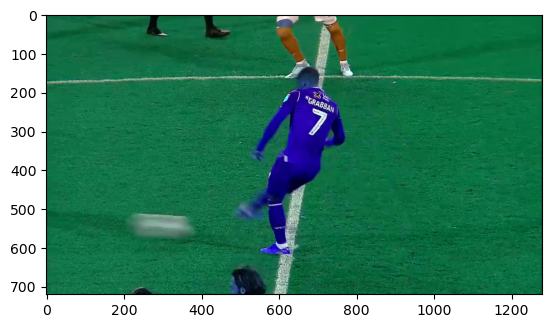

In [18]:
%matplotlib inline

plt.imshow(frame)

# Final Export

In [19]:
OUTPUT_DIR = Path("../data/processed/")
video_high_label = None
video_high = None
video_low_label = None
video_low = None
for row in df.iterrows():
    _, row = row

    # load the video
    if video_high_label != row.url_local:
        video_file_high = Path("../data/spotting-ball-2024/"+ row["url_local"] + "/720p.mp4")
        video_high = cv2.VideoCapture(str(video_file_high))
        video_high_label = row["url_local"]
    if video_low_label != row.url_local:
        video_file_low = Path("../data/spotting-ball-2024/"+ row["url_local"] + "/224p.mp4")
        video_low = cv2.VideoCapture(str(video_file_low))
        video_low_label = row["url_local"]

    # select the frame
    video_high.set(cv2.CAP_PROP_POS_MSEC, int(row['position']))
    video_low.set(cv2.CAP_PROP_POS_MSEC, int(row['position']))

    # create dir path if needed
    output_game_folder = (OUTPUT_DIR / row.url_local)
    output_game_folder.mkdir(parents=True, exist_ok=True)

    # output the images
    s_high, frame_high = video_high.read()
    s_low, frame_low = video_low.read()
    low_res_file = output_game_folder / f"{row['position']}_224p.png"
    high_res_file = output_game_folder / f"{row['position']}_720p.png"

    if s_low:
        cv2.imwrite(str(low_res_file), frame_low)
    else:
        print(f"Unable to write LOW:\t {row}")
    if s_high:
        cv2.imwrite(str(high_res_file), frame_high)
    else:
        print(f"Unable to write HIGH:\t {row}")

# Write the Data for Pandas DF as well

In [ ]:
df.to_csv("../data/processed/dataframe.csv")